## K nearest neighbour

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn 
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['Flower Name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

### Sepal length vs Sepal width (Sepal vs Virsicolor)

Text(0, 0.5, 'Sepal Width')

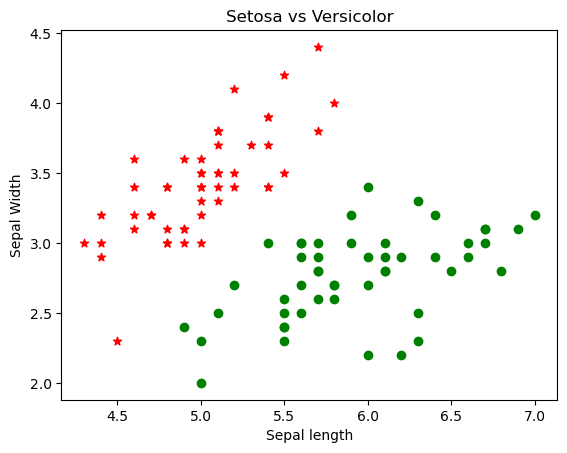

In [12]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='*',color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='o',color='green')
plt.title('Setosa vs Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')

### Petal length vs Petal width (Setosa vs Versicolor)

Text(0, 0.5, 'Petal Width')

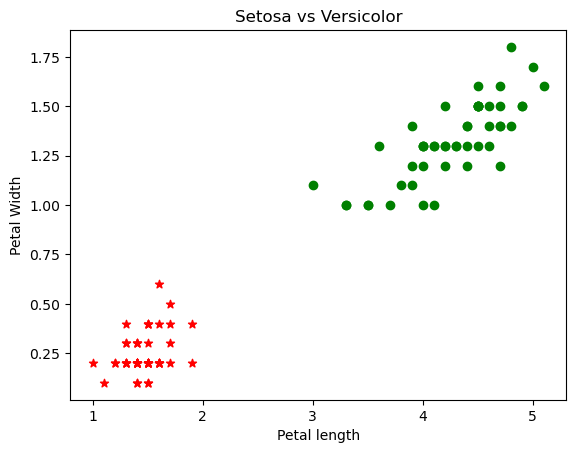

In [13]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='*',color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='o',color='green')
plt.title('Setosa vs Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')

In [17]:
X = df.drop(['target','Flower Name'], axis='columns')
y = df.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [34]:
len(x_train)

120

In [35]:
len(x_test)

30

In [36]:
len(y_train)

120

In [37]:
len(y_test)

30

## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10)

In [46]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [47]:
classifier.score(x_test,y_test)

0.9666666666666667

In [52]:
y_pred=classifier.predict(x_test)

## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [56]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(20.72222222222222, 0.5, 'Truth')

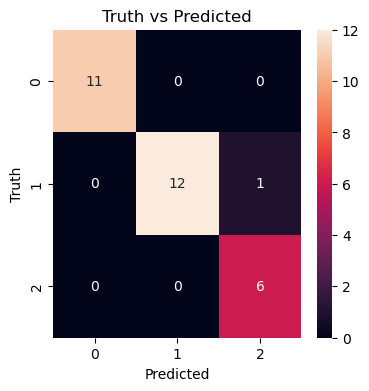

In [60]:
plt.figure(figsize=(4,4))
seaborn.heatmap(cm,annot=True)
plt.title('Truth vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Observation**/

here 0 as setosa flower has repeated 11 times, versicolor flower flower has repated 12 times and virginica flower has repeated 6 times 